In [1]:
"""
Assumes CSV files are in the same directory
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Env vars
DATA_PATH_FACEBOOK = "../../big_companies/collect_data/facebook.csv"
DATA_PATH_AMAZON = "../../big_companies/collect_data/amazon.csv"
DATA_PATH_APPLE = "../../big_companies/collect_data/apple.csv"
DATA_PATH_MICROSOFT = "../../big_companies/collect_data/microsoft.csv"

SEP = ','
COL_NAMES = ["RepoID",
             "Name",
             "Type",
             "Topics",
             "Visibility",
             "Language",
             "LanguageURL",
             "Published",
             "Last_Modified",
             "Stars",
             "Forks",
             "WatchCount",
             "NetworkCount",
             "IssueCount",
             "PRCount",
             "ProjectsCount",
             "BranchCount",
             "DownloadCount",
             "ContributorCount",
             "RepoURL"]
# Pull CSV to DF
data_facebook = pd.read_csv(DATA_PATH_FACEBOOK, sep=SEP, names=COL_NAMES)
data_amazon = pd.read_csv(DATA_PATH_AMAZON, sep=SEP, names=COL_NAMES)
data_apple = pd.read_csv(DATA_PATH_APPLE, sep=SEP, names=COL_NAMES)
data_microsoft = pd.read_csv(DATA_PATH_MICROSOFT, sep=SEP, names=COL_NAMES)
# SANITIZING $

# Remove duplicates
data_facebook.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_facebook['Published'] = pd.to_datetime(data_facebook['Published'])

# extract year from the 'Published' column
data_facebook['Published'] = data_facebook['Published'].dt.year

# Fill NaN's
data_facebook['Published'].fillna(0).astype(int)
data_facebook['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_facebook.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_amazon.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_amazon['Published'] = pd.to_datetime(data_amazon['Published'])

# extract year from the 'Published' column
data_amazon['Published'] = data_amazon['Published'].dt.year

# Fill NaN's
data_amazon['Published'].fillna(0).astype(int)
data_amazon['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_amazon.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_apple.drop_duplicates(inplace=True)

# convert 'Published' column to datetime data_apple
data_apple['Published'] = pd.to_datetime(data_apple['Published'])

# extract year from the 'Published' column
data_apple['Published'] = data_apple['Published'].dt.year

# Fill NaN's
data_apple['Published'].fillna(0).astype(int)
data_apple['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_apple.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_microsoft.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_microsoft['Published'] = pd.to_datetime(data_microsoft['Published'])

# extract year from the 'Published' column
data_microsoft['Published'] = data_microsoft['Published'].dt.year

# Fill NaN's
data_microsoft['Published'].fillna(0).astype(int)
data_microsoft['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_microsoft.dropna(subset=['Language'], inplace=True)
data_all = pd.concat([data_facebook, data_amazon, data_apple, data_microsoft])

In [2]:
# Assumes csv import code is above
language_means_ContributorCount = data_all.groupby(
    "Language"
)["ContributorCount"].sum().reset_index().sort_values(by="ContributorCount", ascending=False)

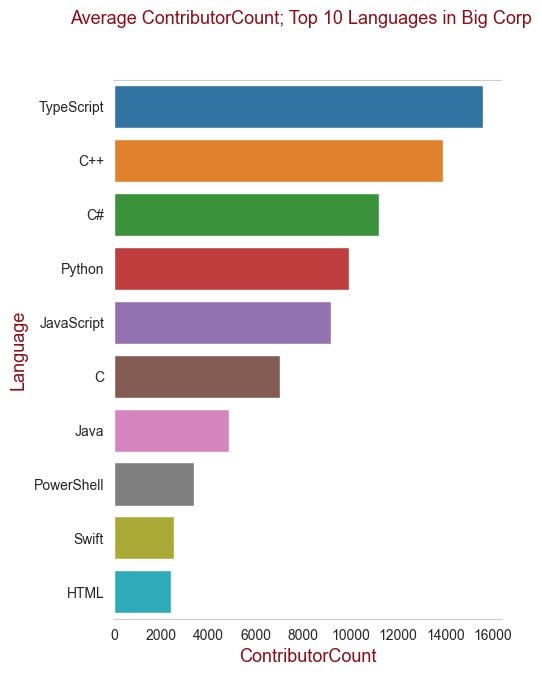

In [3]:
# Copy frame and select attribute to explore
language_data = language_means_ContributorCount
attribute = "ContributorCount" # Attribute
row_amount = 10     # Number of rows to plot

# set figure size
fig, ax = plt.subplots(figsize=(5, 7))

# Select color for edge
plt.rcParams['axes.edgecolor'] = '#fc4293'

# Remove edge on right and left sides of graph
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data from language head
# Select head() for top amount to showcase
# Data is already sorted by stars so most starred will be at the top
# The more rows to showcase the height parameter in figsize should be adjusted as well
# i.e 10 for head(50)
sns.barplot(data=language_data.head(row_amount), x=attribute, y='Language');

# X/Y axis titles and style
ax.set_xlabel(f'{attribute}', fontsize=13, color='#8f0d18')
ax.set_ylabel('Language', fontsize=13, color='#8f0d18')
fig.suptitle(f'Average {attribute}; Top {row_amount} Languages in Big Corp', fontsize=13, color='#8f0d18');